In [78]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [90]:
#read the data in from the schools dataset
school_cols = ["time_period","new_la_code", "number_of_schools", "la_name", "Sex_of_school_description", "Phase-type_grouping", "TypeOfEstablishment_(name)","Denomination", "Admissions_Policy", "Urban_rural","Academy_flag"]
schools = pd.read_csv("spc_school_characteristics_20210727.csv", usecols=school_cols)
schools.rename(columns={"new_la_code":"la_code","Phase-type_grouping": "Phase_Grouping", "TypeOfEstablishment_(name)":"TypeOfEstablishment"}, inplace=True)

#retrieve only totals and 
schools = schools.query("time_period == 202021 &Sex_of_school_description == 'Total' & Phase_Grouping == 'Total' & TypeOfEstablishment == 'Total' & Admissions_Policy == 'Total' & Urban_rural == 'Total' & Academy_flag == 'Total' & Denomination == 'Total'")

#drop any rows with missing data
schools = schools.dropna()

#remove unnecessary columns
schools = schools[["la_code", "la_name", "number_of_schools"]].copy()
schools.head()

,la_code,la_name,number_of_schools
2952,E08000010,Wigan,136
2953,E06000054,Wiltshire,261
2954,E10000007,Derbyshire,446
2955,E09000011,Greenwich,105
2956,E08000009,Trafford,103


In [91]:
#read in data from labour productivity dataset
labour_prod = pd.read_excel("ladproductivity.xls", sheet_name="A1", header=4, skipfooter=7, skiprows=[5], usecols=[0,1,17])

#assign same column name for local authority code
labour_prod.rename(columns={"LAD Code":"la_code", "index.15":"productivity_index"}, inplace=True)
labour_prod.head()

,la_code,LAD Name,productivity_index
0,E06000001,Hartlepool,80.53
1,E06000002,Middlesbrough,83.35
2,E06000003,Redcar and Cleveland,75.50
3,E06000004,Stockton-on-Tees,97.78
4,E06000005,Darlington,92.95


In [92]:
#merge schools and labour_prod data frame on la_code column

schools_labour_prod = pd.merge(schools, labour_prod, on='la_code')
schools_labour_prod

,la_code,la_name,number_of_schools,LAD Name,productivity_index
0,E08000010,Wigan,136,Wigan,77.16
1,E06000054,Wiltshire,261,Wiltshire,86.98
2,E09000011,Greenwich,105,Greenwich,109.37
3,E08000009,Trafford,103,Trafford,103.86
4,E06000044,Portsmouth,66,Portsmouth,97.90
...,...,...,...,...,...
118,E06000032,Luton,80,Luton,103.24
119,E08000022,North Tyneside,82,North Tyneside,90.45
120,E06000035,Medway,110,Medway,103.96
121,E09000014,Haringey,100,Haringey,91.37


# Scatter Plot - # of Schools and Labour Productivity by Local Authority

<AxesSubplot:xlabel='number_of_schools', ylabel='productivity_index'>

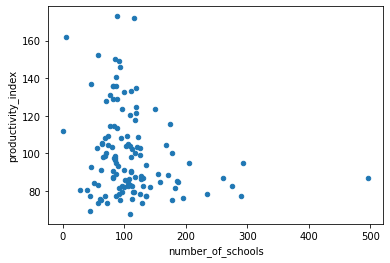

In [93]:
#scatter plot of data
schools_labour_prod.plot.scatter(x="number_of_schools", y="productivity_index")

# Line of Best Fit - # of Schools and Labour Productivity by Local Authority
There seems to be no real correlation between the number of schools in a local authority and its labour productivity up until the point at which the number of schools in a local authority exceeds 100

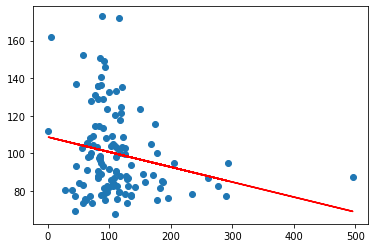

In [94]:
#perform some linear regression to find our line of best fit
#convert columns to numpy arrays
X = schools_labour_prod["number_of_schools"].to_numpy().reshape(-1,1)
Y = schools_labour_prod["productivity_index"].to_numpy().reshape(-1,1)

#instantiate linear regression object
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

#show linear regression
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()